In [351]:
import numpy as np
import keras
from sklearn import datasets
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical

In [352]:
n_pts = 500
centers = [[-1, 1], [-1, -1], [1, -1], [1, 1], [0, 0]]
X, y = datasets.make_blobs(n_samples=n_pts, random_state=123, centers=centers, cluster_std = 0.4)


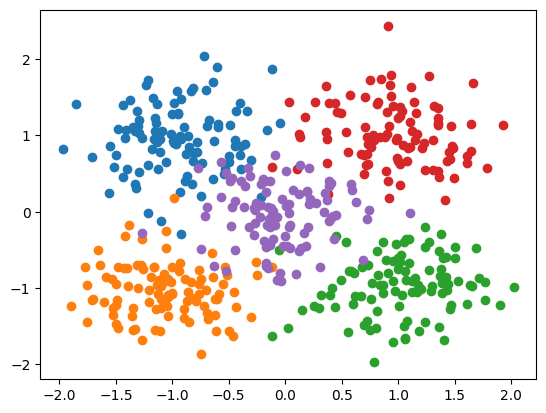

In [353]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])

In [354]:
print(y)
y_cat = to_categorical(y, 5)
print(y_cat)


[3 3 4 0 2 1 1 4 4 4 3 2 1 0 2 4 4 4 3 0 3 0 3 4 1 3 1 0 4 2 3 1 0 4 1 0 4
 0 4 0 1 3 3 0 3 1 3 4 0 4 0 2 3 0 2 4 4 0 3 4 1 3 0 4 2 1 1 2 3 2 3 2 1 1
 3 2 4 2 2 3 0 2 4 3 2 1 3 3 3 3 1 1 4 2 4 4 1 2 4 1 4 2 2 3 4 1 1 3 3 2 1
 3 1 0 1 0 4 4 4 3 1 3 3 3 1 4 4 0 2 0 1 1 0 4 0 1 1 4 4 0 4 3 4 4 2 4 0 0
 0 4 2 0 4 1 0 2 2 1 3 0 1 2 2 4 4 1 3 2 3 3 3 2 2 2 4 0 1 1 0 1 4 4 3 2 3
 2 3 1 0 3 4 2 1 0 0 0 4 3 0 4 2 2 3 1 0 4 4 1 2 1 3 1 4 4 0 1 4 2 4 0 4 0
 1 2 3 0 1 0 3 3 4 3 4 0 0 1 1 3 0 4 1 4 2 1 2 4 4 3 3 1 1 1 4 1 1 1 4 3 1
 0 0 2 2 2 3 2 3 4 2 3 3 1 1 0 4 0 3 0 0 0 3 2 2 1 4 2 0 0 2 2 1 3 3 1 3 0
 0 1 4 2 2 2 1 0 0 1 0 0 1 2 4 2 4 2 1 3 0 0 1 4 1 2 4 4 4 3 4 1 2 3 1 3 1
 0 0 2 4 1 3 1 1 2 1 4 3 1 2 3 2 0 4 1 4 0 2 2 0 1 2 2 4 4 0 4 1 3 3 2 2 0
 4 3 3 1 2 2 4 3 0 3 3 3 3 0 1 4 4 4 0 3 3 2 4 0 4 0 0 4 2 2 2 3 0 2 0 0 1
 2 3 0 0 2 4 2 3 0 3 0 1 0 4 1 0 0 1 3 1 4 0 2 1 1 3 2 3 2 2 2 3 1 0 0 0 1
 3 4 2 1 0 2 1 4 3 3 4 0 0 2 2 0 0 2 2 3 4 3 2 2 2 2 0 1 3 0 2 1 2 0 2 3 4
 3 1 4 3 3 0 2 4 0 4 1 3 

In [355]:
model = Sequential()
model.add(Dense(units=5, input_shape=(2,), activation = 'softmax'))
model.compile(Adam(0.1), loss='categorical_crossentropy', metrics=['accuracy'])

In [356]:
model.fit(x=X, y=y_cat, verbose=1, batch_size = 50, epochs=100)

Epoch 1/100
10/10 [==============================] - 0s 2ms/step - loss: 1.1077 - accuracy: 0.5880
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5646 - accuracy: 0.8420
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3864 - accuracy: 0.9300
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3152 - accuracy: 0.9400
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2757 - accuracy: 0.9460
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2518 - accuracy: 0.9460
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2373 - accuracy: 0.9500
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2254 - accuracy: 0.9480
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2154 - accuracy: 0.9480
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2072 - accuracy: 0.9480
Epoch 11/

In [357]:
def plot_decision_boundary(X, y_cat, model):
    x_span = np.linspace(min(X[:,0]) - 1, max(X[:,0]) + 1, 50)
    y_span = np.linspace(min(X[:,1]) - 1, max(X[:,1]) + 1, 50)
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    print (xx_)
    print (yy_)
    grid = np.c_[xx_, yy_]
    pred_func = np.argmax(model.predict(grid), axis=1) #changed from stack overflow
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)


[-2.9706717  -2.84833268 -2.72599367 ...  2.77926206  2.90160108
  3.02394009]
[-2.97723031 -2.97723031 -2.97723031 ...  3.42863169  3.42863169
  3.42863169]
79/79 [==============================] - 0s 1ms/step


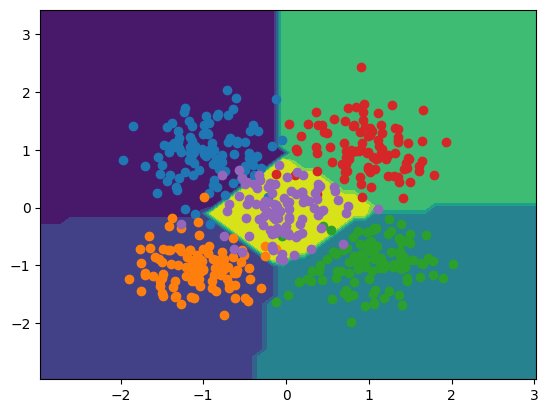

In [358]:
plot_decision_boundary(X, y_cat, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])

[-2.9706717  -2.84833268 -2.72599367 ...  2.77926206  2.90160108
  3.02394009]
[-2.97723031 -2.97723031 -2.97723031 ...  3.42863169  3.42863169
  3.42863169]
1/1 [==============================] - 0s 27ms/step
Prediction is:  [2]


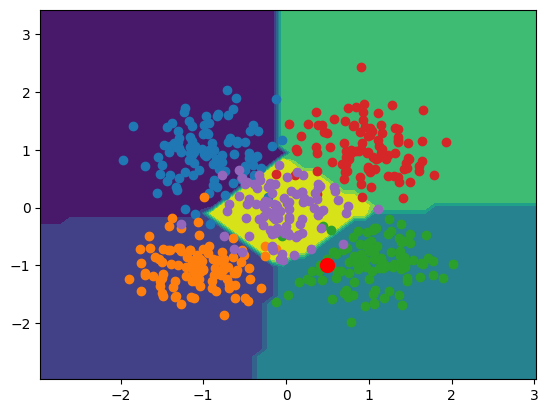

In [359]:
'''x_span = np.linspace(min(X[:,0]) - 1, max(X[:,0]) + 1, 50)
y_span = np.linspace(min(X[:,1]) - 1, max(X[:,1]) + 1, 50)
xx, yy = np.meshgrid(x_span, y_span)
xx_, yy_ = xx.ravel(), yy.ravel()
print (xx_)
print (yy_)
grid = np.c_[xx_, yy_]
pred_func = np.argmax(model.predict(grid), axis= -1)    '''              #this code is been added to remove errors

plot_decision_boundary(X, y_cat, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])
x = 0.5
y = -1
#classes=np.argmax(pred_func,axis= -1)
point = np.array([[x, y]])
#prediction=np.argmax(pred_func,axis= -1)
#prediction=np.argmax(model.predict(x), axis= 1)
#predictions = (model.predict(point) > 0.5).astype("int32")
predictions = np.argmax(model.predict(point),axis=1)
plt.plot([x], [y], marker='o', markersize=10, color="r")
print("Prediction is: ", predictions)                   #prediction is coming out wrong